<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/404%20Error/404_Error_Assignment_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Property in Kuala Lumpur

This project is about an exploratory data analysis (EDA) on the properties in Kuala Lumpur. The dataset ```kl_properties.csv``` contains the data of properties in Kuala Lumpur area. The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/thajegan76/real-estate-kuala-lumpur-malaysia). It contains data including pricing, size, number of bedrooms, bathrooms and the specific area in Kuala Lumpur. We used Pandas, Numpy, SciPy, Seaborn, Matplolib and Plotly to do processing, cleaning, analysis and visualization on the data.
<br><br>
**Group Members:**
1. **ONG HAN WAH (A20EC0129)**
2. **SINGTHAI SRISOI (A20EC0147)**

## Downloading the Dataset

The dataset can be downloaded from https://www.kaggle.com/datasets/thajegan76/real-estate-kuala-lumpur-malaysia.

The dataset is also uploaded to [Github](https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/404%20Error/kl_properties.csv). In this project, we will link the dataset from Github.

__Dataset Attributes with Description:__ <br>

The dataset has 7791 rows and 7 columns

|Attribute|Description|
|:--------|:----------|
|`Title`|Title of property|
|`Price`|Price of property in ringit Malaysia|
|`Area`|Location of property in which area of Kuala Lumpur|
|`Category`|Category of property|
|`Size`|Size of property in unit square feet|
|`Bedrooms`|Number of bedroom|
|`Bathrooms`|Number of bathroom|

## Data Preparation and Cleaning



Before we proceed to the analysis of data, we must process and clean the data. In this section, we handle missing, incorrect or invalid data. We also remove irrelevant data and convert data types.

First, import the Pandas and Numpy library.

In [ ]:
import pandas as pd
import numpy as np

#### Loading data using pandas

In [ ]:
datafile = 'https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/404%20Error/kl_properties.csv'
df = pd.read_csv(datafile)

#### The first 5 row of the data

In [ ]:
df.head()

,Title,Price,Area,Category,Size,Bedrooms,Bathrooms
0,"M City Serviced Residence Jalan Ampang 886sf, ...",RM 690 000,AMPANG,Apartments,886 sq.ft.,2 Bedrooms,2 Bathrooms
1,Cheapest fully furnished suria jelatek residen...,RM 420 000,AMPANG,Apartments,858 sq.ft.,3 Bedrooms,2 Bathrooms
2,3bed 2bath Suria Jelatek Condo 5 min to LRT an...,RM 420 000,AMPANG,Apartments,860 sq.ft.,3 Bedrooms,2 Bathrooms
3,"[30% Below,1037sf] Direct Subsale not Auction!...",RM 568 444,AMPANG,Apartments,1037 sq.ft.,3 Bedrooms,2 Bathrooms
4,HOT area | Tiara Ampang | Near Ampang Point | ...,RM 618 000,AMPANG,Apartments,1650 sq.ft.,4 Bedrooms,2 Bathrooms


#### Number of row, column, range

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      7791 non-null   object
 1   Price      7791 non-null   object
 2   Area       7791 non-null   object
 3   Category   7791 non-null   object
 4   Size       7791 non-null   object
 5   Bedrooms   7791 non-null   object
 6   Bathrooms  7791 non-null   object
dtypes: object(7)
memory usage: 426.2+ KB


#### Check if NaN exist

In [ ]:
df.isnull().sum(axis=0)

Title        0
Price        0
Area         0
Category     0
Size         0
Bedrooms     0
Bathrooms    0
dtype: int64

#### Drop unwanted column

In [ ]:
df.drop('Title', axis='columns',inplace=True)
df.head()

,Price,Area,Category,Size,Bedrooms,Bathrooms
0,RM 690 000,AMPANG,Apartments,886 sq.ft.,2 Bedrooms,2 Bathrooms
1,RM 420 000,AMPANG,Apartments,858 sq.ft.,3 Bedrooms,2 Bathrooms
2,RM 420 000,AMPANG,Apartments,860 sq.ft.,3 Bedrooms,2 Bathrooms
3,RM 568 444,AMPANG,Apartments,1037 sq.ft.,3 Bedrooms,2 Bathrooms
4,RM 618 000,AMPANG,Apartments,1650 sq.ft.,4 Bedrooms,2 Bathrooms


#### Futher preprocessing

We cast the data type into the type we want. For example we remove the 'RM' unit int the 'Price' column and cast it into integer. We also removed some data that is too small or too big.

In [ ]:
# remove 'RM' sign in 'Price' column and cast the type into int64
df['Price'] = df['Price'].str.replace('RM ', '')
df['Price'] = df['Price'].str.replace(' ', '')
df['Price'] = df['Price'].astype('int64')

# remove the unit 'sq.ft.' in 'Size' column and cast into int64
df['Size'] = df['Size'].str.replace(' sq.ft.', '')
df['Size'] = df['Size'].astype('int64')
# remove data which size is too small or too big
df.drop(df[(df['Size'] <= 10) | (df['Size'] > 100000)].index, axis='index', inplace=True)

# remove unit 'Bedrooms' in column 'Bedrooms' and cast into int32
df['Bedrooms'] = df['Bedrooms'].str.replace(' Bedrooms', '')
df['Bedrooms'] = df['Bedrooms'].str.replace(' Bedroom', '')
df['Bedrooms'] = df['Bedrooms'].str.replace('More than 10', '10')
df['Bedrooms'] = df['Bedrooms'].astype('int32')

# remove unit 'Bathrooms' in column 'Bathrooms' and cast into int32
df['Bathrooms'] = df['Bathrooms'].str.replace(' Bathrooms', '')
df['Bathrooms'] = df['Bathrooms'].str.replace(' Bathroom', '')
df['Bathrooms'] = df['Bathrooms'].str.replace('More than 10', '10')
df['Bathrooms'] = df['Bathrooms'].astype('int32')

<ipython-input-7-6ea5ea6e8b88>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size'] = df['Size'].str.replace(' sq.ft.', '')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7780 entries, 0 to 7790
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      7780 non-null   int64 
 1   Area       7780 non-null   object
 2   Category   7780 non-null   object
 3   Size       7780 non-null   int64 
 4   Bedrooms   7780 non-null   int32 
 5   Bathrooms  7780 non-null   int32 
dtypes: int32(2), int64(2), object(2)
memory usage: 364.7+ KB


In [ ]:
df.head(10)

,Price,Area,Category,Size,Bedrooms,Bathrooms
0,690000,AMPANG,Apartments,886,2,2
1,420000,AMPANG,Apartments,858,3,2
2,420000,AMPANG,Apartments,860,3,2
3,568444,AMPANG,Apartments,1037,3,2
4,618000,AMPANG,Apartments,1650,4,2
5,428000,AMPANG,Apartments,1250,4,2
6,450000,AMPANG,Apartments,705,1,1
7,368000,AMPANG,Apartments,957,3,2
8,525000,AMPANG,Apartments,1420,3,2
9,680000,AMPANG,Apartments,1865,5,4


## Exploratory Analysis and Visualization

In this step, we start to explore and find the posible way to visualize our data. The goal of this step is to make our data user readable, rather than in table form.



Let's begin by importing `plotly`, `matplotlib.pyplot` and `seaborn`.

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Descriptive Statistics

Use `describe()` to compute and display descriptive statistics summary including the count, mean, standard deviation, percentile, min and max value of each numerical column.

In [ ]:
df.describe()

,Price,Size,Bedrooms,Bathrooms
count,7.780000e+03,7780.000000,7780.000000,7780.000000
mean,4.252607e+05,999.486761,2.956427,2.027121
std,4.413468e+05,415.789294,0.659581,0.594494
min,2.200000e+04,82.000000,1.000000,1.000000
25%,2.850000e+05,805.750000,3.000000,2.000000
50%,3.724440e+05,948.000000,3.000000,2.000000
75%,4.800000e+05,1126.250000,3.000000,2.000000
max,2.500000e+07,17000.000000,10.000000,10.000000


#### Price in area
The box plot below shows the price of properties grouped by area. The price is normalized with log base 10 for better visualization.

Text(0.5, 1.0, 'Price in area')

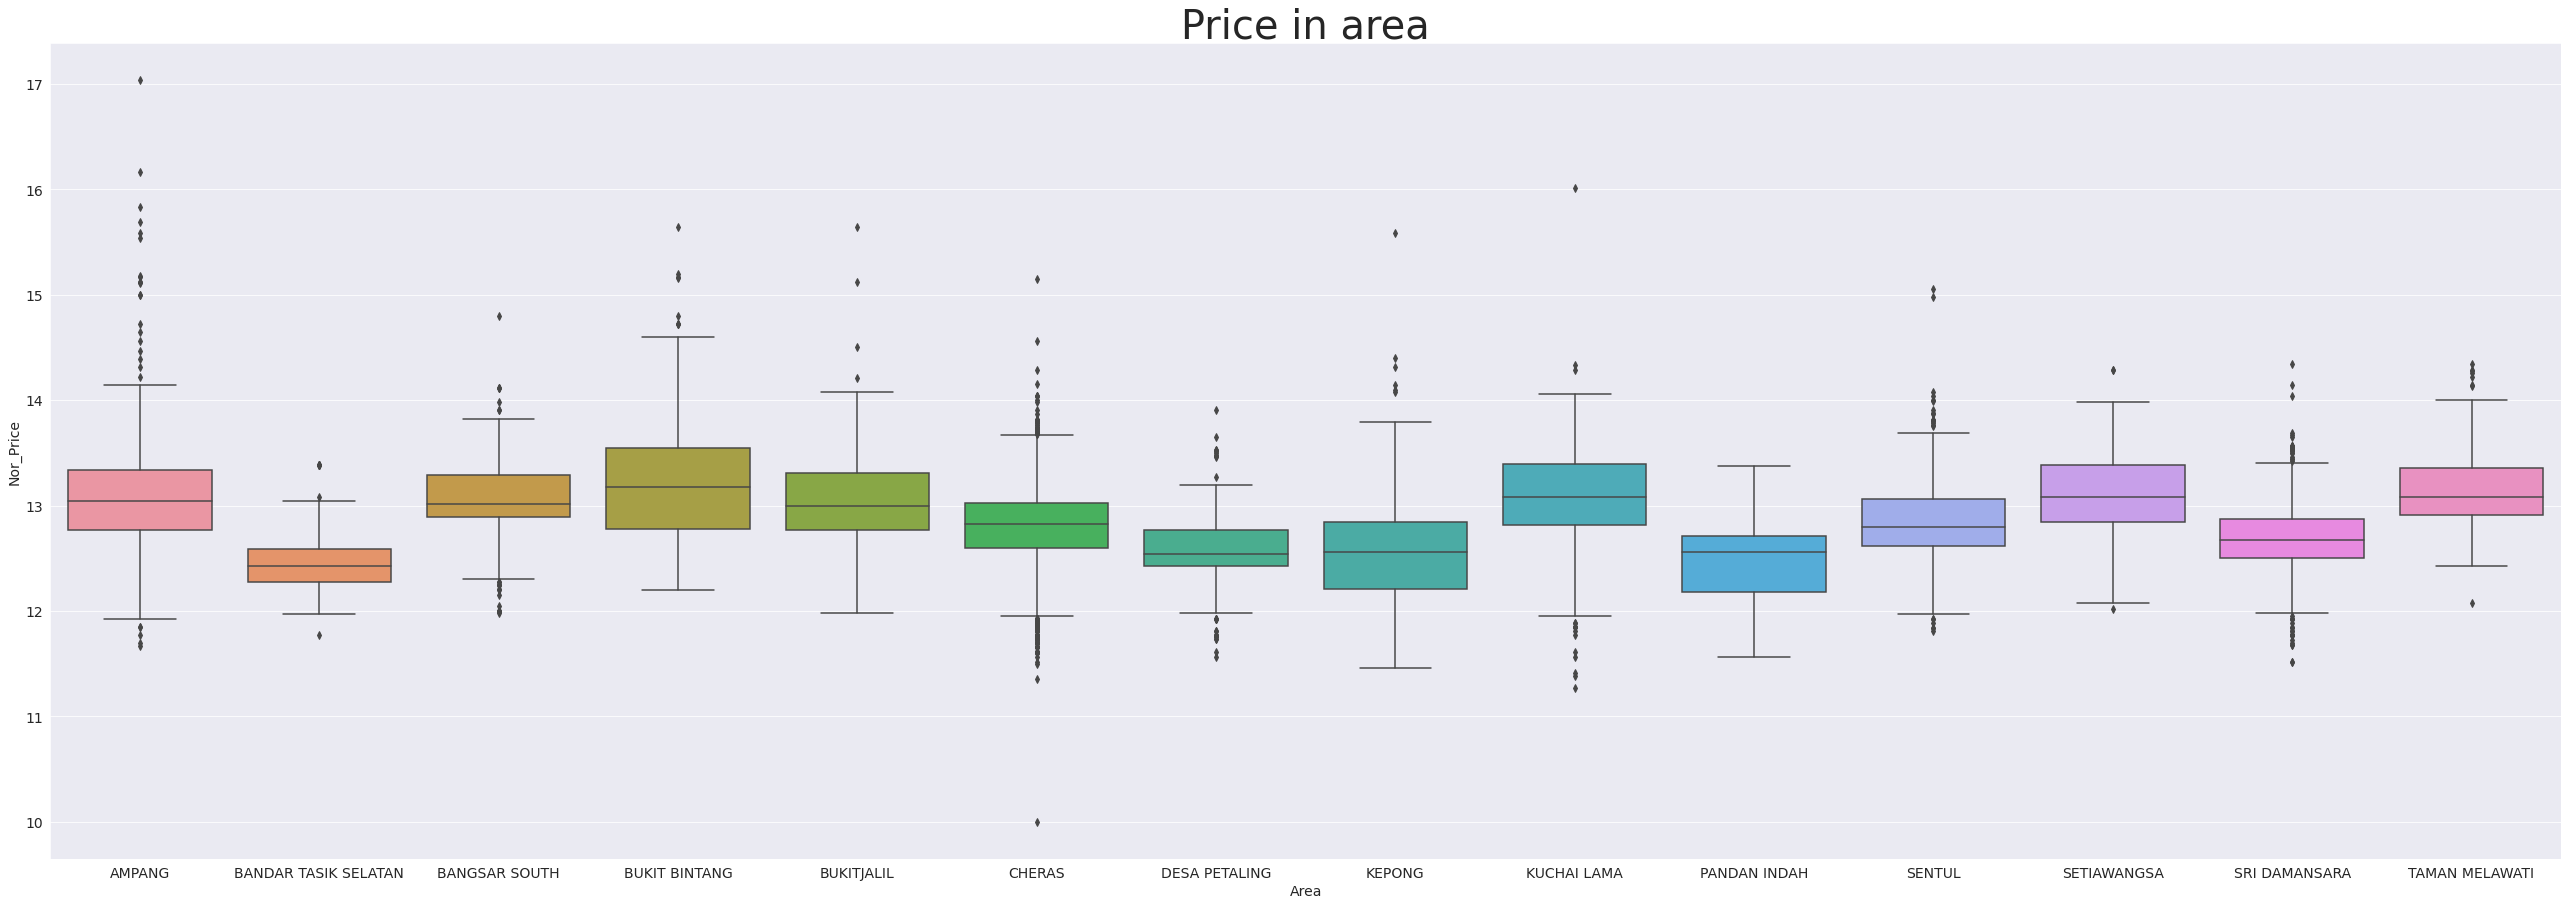

In [ ]:
# log10
df['Nor_Price'] = df['Price'].apply(lambda x: np.log(x) if x != 0 else 0)

df.sort_values(by=['Area', 'Price', 'Bedrooms'], inplace=True)

plt.figure(figsize=(45, 15))
ax = sns.boxplot(data=df, x='Area', y='Nor_Price')
ax.set_title('Price in area', fontdict={'fontsize': 40})

#### Price per square feat in each area
The scatter plot graph below shows the price per square feet in each area. Different color represented different area. Plotly graph is interactive, hover on the data point to see its information.

In [ ]:
fig = px.scatter(df, x='Size', y='Price', color='Area', 
                 hover_data=['Bedrooms','Bathrooms'], # add other columns to hover data
                 labels={ # rename x and y labels
                     "Size": "Size (sq.ft.)",
                     "Price": "Price (RM)"
                 })
fig.show()

#### Number of bedroom and bathroom in a properties <a name="violin"></a>

The violin plot below show the density of the number of bedroom and bathroom in the properties. The wider portion of violin indicates the higher density and narrow region represents relatively lower density.

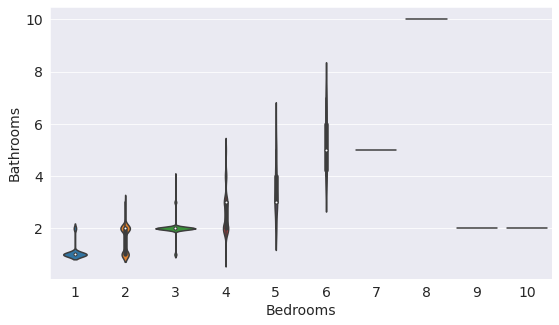

In [ ]:
sns.violinplot(x = "Bedrooms", y = "Bathrooms", data=df)
plt.show()

####Correlation heatmap <a name="heatmap1"></a>

Correlation is a measure of the statistical relationship between two comparable
variables or quantities(bivariate data). Correlation is positive when the values increase together, and is negative when one value decreases as the other
increases.

In [ ]:
# Compute pairwise correlation of columns
corr_matrix = df.corr()
corr_matrix.head()

,Price,Size,Bedrooms,Bathrooms,Nor_Price
Price,1.000000,0.731858,0.256533,0.447270,0.651852
Size,0.731858,1.000000,0.569552,0.686311,0.668029
Bedrooms,0.256533,0.569552,1.000000,0.623942,0.322180
Bathrooms,0.447270,0.686311,0.623942,1.000000,0.548014
Nor_Price,0.651852,0.668029,0.322180,0.548014,1.000000


The heatmap below plots the 2D correlation matrix between each pair of columns, with colors to represent the value.

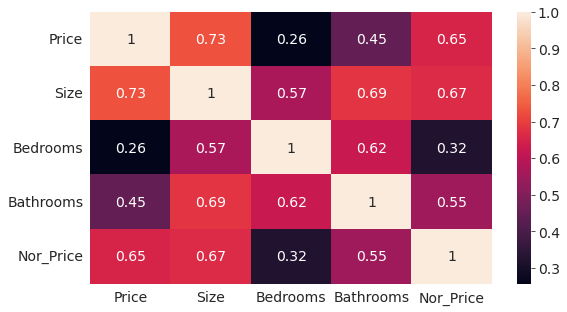

In [ ]:
sns.heatmap(corr_matrix, annot=True)

#### Heatmap

In [ ]:
new_df = df.groupby(['Area'])['Price'].describe()
new_df.set_index(new_df.columns[1])
new_df.index.name = None
new_df.drop(columns=['count'], inplace=True)
new_df['mean'] = (new_df['mean'] - new_df['mean'].min())/(new_df['mean'].max() - new_df['mean'].min())
new_df['std'] = (new_df['std'] - new_df['std'].min())/(new_df['std'].max() - new_df['std'].min())
new_df['min'] = (new_df['min'] - new_df['min'].min())/(new_df['min'].max() - new_df['min'].min())
new_df['25%'] = (new_df['25%'] - new_df['25%'].min())/(new_df['25%'].max() - new_df['25%'].min())
new_df['50%'] = (new_df['50%'] - new_df['50%'].min())/(new_df['50%'].max() - new_df['50%'].min())
new_df['75%'] = (new_df['75%'] - new_df['75%'].min())/(new_df['75%'].max() - new_df['75%'].min())
new_df['max'] = (new_df['max'] - new_df['max'].min())/(new_df['max'].max() - new_df['max'].min())
new_df

,mean,std,min,25%,50%,75%,max
AMPANG,1.000000,1.000000,0.534689,0.751202,0.762143,0.692041,1.000000
BANDAR TASIK SELATAN,0.000000,0.000000,0.607910,0.096154,0.000000,0.000000,0.000205
BANGSAR SOUTH,0.434741,0.096609,0.779661,0.961538,0.717857,0.627372,0.083556
BUKIT BINTANG,0.844222,0.383992,1.000000,0.769231,1.000000,1.000000,0.228085
BUKITJALIL,0.414614,0.142932,0.779661,0.745192,0.682143,0.648461,0.228085
CHERAS,0.190866,0.039363,0.000000,0.480769,0.439286,0.342682,0.129542
DESA PETALING,0.052284,0.017972,0.468927,0.264423,0.110714,0.121257,0.018682
KEPONG,0.085405,0.081079,0.411130,0.024038,0.128571,0.184521,0.215767
KUCHAI LAMA,0.500480,0.258273,0.316384,0.831731,0.817857,0.764445,0.343051
PANDAN INDAH,0.012651,0.006486,0.468927,0.000000,0.128571,0.079081,0.000000


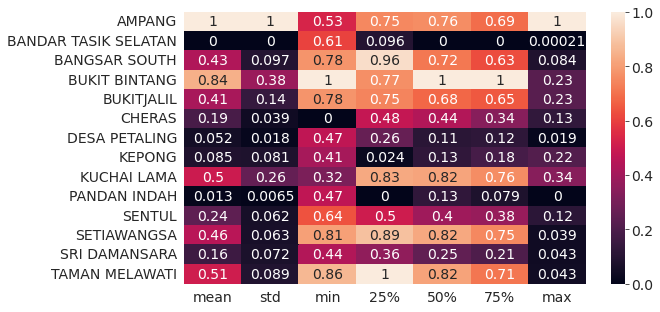

In [ ]:
sns.heatmap(new_df, annot=True)

## Asking and Answering Questions

In this section, we ask 5 questions about the dataset and answer them using various Python libraries functions.



#### **Q1:** What is the average price of properties in Kuala Lumpur and in each area?

In [ ]:
# calculate the average price of all properties
df['Price'].mean().round(2)

425260.68

In [ ]:
# group the data by Area
# compute mean price for each area and rename the column to "Average_Price_RM"
# round mean price to 2 decimal places and sort the values in descending order
df.groupby(['Area']).agg(Average_Price_RM=('Price', 'mean')).round(2).sort_values(by=['Average_Price_RM'], ascending=False)

,Average_Price_RM
Area,
AMPANG,826767.58
BUKIT BINTANG,741131.02
TAMAN MELAWATI,556412.88
KUCHAI LAMA,552164.10
SETIAWANGSA,527724.06
BANGSAR SOUTH,516024.96
BUKITJALIL,504960.47
SENTUL,410256.82
CHERAS,381958.30


The average price of properties in Kuala Lumpur is ```RM 425260.68```. Ampang is the area with the highest average property price at ```RM 826767.58``` whereas Bandar Tasik Selatan has the lowest average property price of ```RM 277032.57``` among Kuala Lumpur areas.

#### **Q2:** What are the most common numbers of bedrooms and bathrooms in these properties?

In [ ]:
# groupby() splits the data into groups and size() return the number of elements in each groups
df.groupby(['Bedrooms','Bathrooms']).size().sort_values(ascending=False)

Bedrooms  Bathrooms
3         2            5262
2         2             458
4         2             397
2         1             342
4         3             263
1         1             260
3         1             251
          3             229
4         4              97
          5              43
5         3              42
1         2              26
2         3              22
5         4              21
3         4              16
5         2              15
          5              14
6         4               4
          5               4
5         6               3
6         6               3
          7               3
8         10              1
9         2               1
4         1               1
7         5               1
10        2               1
dtype: int64

3 bedrooms and 2 bathrooms properties are the most common with a count of 5262 out of 7780. Properties with more than 5 bedrooms or bathrooms are rare in Kuala Lumpur. This can also be seen in the [violin plot](#violin) generated above.

#### **Q3:** What is the relationship between size and price of the properties?

In [ ]:
# import scipy to calculate correlation
import scipy.stats

# pearsonr() return the correlation coefficient and the p-value
# use index [0] to extract the correlation coefficient from the result
scipy.stats.pearsonr(df['Size'], df['Price'])[0]

0.7318581206873379

By using Pearson correlation, it is found that the properties size and price have a correlation coefficient of ```0.7318581206873379```, indicating a moderate positive linear correlation. It means that the price increases as the size increases. The correlation coefficients are also shown in the [correlation heatmap](#heatmap1) above.

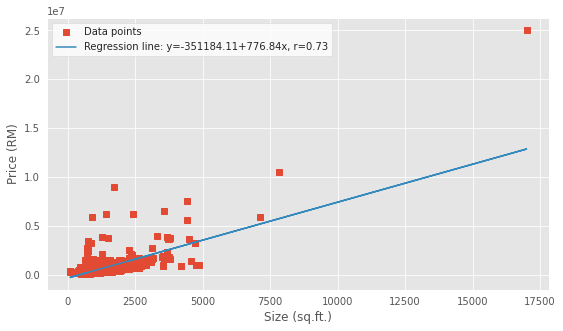

In [ ]:
x, y = df['Size'], df['Price']

# get the slope and the intercept of the regression line, as well as the correlation coefficient
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

# get the string with the equation of the regression line and the value of the correlation coefficient
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# create the x-y plot with .plot()
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Size (sq.ft.)')
ax.set_ylabel('Price (RM)')
ax.legend(facecolor='white')
plt.show()

The graph above plots the linear regression model between the size and the price of properties in Kuala Lumpur.

#### **Q4:** What is the highest price in each area and which area has the highest price?

In [ ]:
df.groupby(['Area'])['Price'].max().sort_values(ascending=False)

Area
AMPANG                  25000000
KUCHAI LAMA              9000000
BUKIT BINTANG            6200000
BUKITJALIL               6200000
KEPONG                   5900000
CHERAS                   3800000
SENTUL                   3470000
BANGSAR SOUTH            2680000
TAMAN MELAWATI           1700000
SRI DAMANSARA            1688888
SETIAWANGSA              1600000
DESA PETALING            1100000
BANDAR TASIK SELATAN      650000
PANDAN INDAH              645000
Name: Price, dtype: int64

AMPANG has the highest pricing amongs those area

#### **Q5:** Which one, number of bedroom or bathroom, have more impact on the pricing of properties?

In [ ]:
scipy.stats.pearsonr(df['Bedrooms'], df['Price'])[0]

0.2565330367747114

In [ ]:
scipy.stats.pearsonr(df['Bathrooms'], df['Price'])[0]

0.4472701832419492

By using Pearson correlation, it is found that the number of bedroom and price have a correlation coefficient of ```0.2565330367747114```, while on the bathroom and price is ```0.4472701832419492```. Hence we can say the bathroom have more impact on the pricing of properties.

<hr>

## Inferences and Conclusion

To sum up everything that we stated so far, we have find several conclusion :   

- Area __AMPANG__ has the highest average pricing while __Bandar Tasik Selatan__ has the lowest average pricing of properties in Kuala Lumpur
- Properties having __3 bedrooms and 2 bathrooms are the most common__ in Kuala Lumpur
- The properties size and price have a correlation coefficient of ```0.7318581206873379```. The larger the size, the higher the price of properties
- Area __AMPANG__ has the highest property price among those area
- Correlation coefficient of number of bedroom and price is ```0.2565330367747114``` and for the correlation coefficient of number of bedroom and price is ```0.4472701832419492```. Both have weak correlation but number of bathroom have more impact on the pricing.


<hr>

## References and Future Work

In this project, we have learnt how to visualize data starting from cleaning the data. This really help on reporting and analysis for further prediction and decision.

Some ideas for future work are:
1. Comparison between different property types in Kuala Lumpur
2. Prediction of properties pricing in Kuala Lumpur

__Reference__:    <br />
[A Complete Guide to Data Visualization in Python With Libraries, Chart, Graphs & More](https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python)